# Machine Learning Foundation

## Course 5, Part e: CNN DEMO

## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

In [1]:
import keras
#from tensorflow.keras.datasets import cifar10
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

[9]


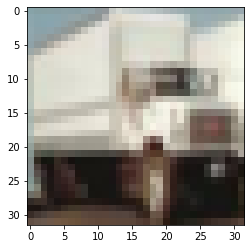

In [4]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
# One-hot encoding in Keras/TF
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [7]:
# Let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.

---

## First CNN
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.

In [8]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()

# First layer: 5x5 convolution with 2x2 stride and 32 filters
# Conv2D has these parameters:
# - filters: the number of filters used (= depth of output)
# - kernel_size: an (x,y) tuple giving the height and width of the kernel
# - strides: an (x,y) tuple giving the stride in each dimension; default and common (1,1)
# - input_shape: required only for the first layer (= image channels)
# - padding: "valid" = no padding, or "same" = zeros evenly;
# When padding="same" and strides=1, the output has the same size as the input
# Otherwise, general formula for the size:
# W_out = (W_in + 2P - F)/S + 1; P: "same" = (F-1)/2 ?
model_1.add(Conv2D(filters=32,
                   kernel_size=(5, 5), # uncommon, we usually take (3,3)
                   strides=(2,2), # uncommon, we usually take (1,1) = default
                   padding='same', # 2, zeros
                   input_shape=x_train.shape[1:]))
# We can specify the activation as a layer (as done here)
# or in the previous layer as a parameter
model_1.add(Activation('relu'))

# Second layer: another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

# Third layer: 2x2 max pooling, which reduces to 3 x 3 x 32
# Parameters od MaxPooling2D:
# - pool_size: the (x,y) size of the grid to be pooled; 2x2 (usual) halvens the size
# - strides: assumed to be the pool_size unless otherwise specified
# - padding: assumed "valid" = no padding
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# Flatten turns 3x3x32 into 288x1
# Flatten appears when going from convolutional layers to
# fully connected layers.
model_1.add(Flatten())
model_1.add(Dense(units=512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

# Always check number of paramaters!
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_2 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

2022-12-05 11:47:06.521703: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 11:47:06.523236: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


We still have 181K parameters, even though this is a "small" model.


In [9]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 64s 1ms/step - loss: 1.7208 - accuracy: 0.3737 - val_loss: 1.5561 - val_accuracy: 0.4413
Epoch 2/15
50000/50000 [==============================] - 66s 1ms/step - loss: 1.4411 - accuracy: 0.4779 - val_loss: 1.3076 - val_accuracy: 0.5297
Epoch 3/15
50000/50000 [==============================] - 67s 1ms/step - loss: 1.3427 - accuracy: 0.5194 - val_loss: 1.4605 - val_accuracy: 0.5018
Epoch 4/15
50000/50000 [==============================] - 66s 1ms/step - loss: 1.2711 - accuracy: 0.5483 - val_loss: 1.1802 - val_accuracy: 0.5779
Epoch 5/15
50000/50000 [==============================] - 66s 1ms/step - loss: 1.2288 - accuracy: 0.5642 - val_loss: 1.4438 - val_accuracy: 0.5028
Epoch 6/15
50000/50000 [==============================] - 65s 1ms/step - loss: 1.1913 - accuracy: 0.5773 - val_loss: 1.2276 - val_accuracy: 0.5771
Epoch 7/15
50000/50000 [==============================] - 64s 1ms/st

In [13]:
# Validation loss and Validation accuracy
model_1.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 157us/step


[1.0745962530136108, 0.6302000284194946]

In [23]:
# Manual computation of the accuracy
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = model_1.predict_classes(x_test)
y_true = np.argmax(y_test, axis=1) # undo one-hot encoding
print(accuracy_score(y_true, y_pred))

0.6302


### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 5 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

5. Try different structures and run times, and see how accurate your model can be.


In [28]:
# Let's build a CNN using Keras' Sequential capabilities

model_2 = Sequential()

# Conv2D has these parameters:
# - filters: the number of filters used (= depth of output)
# - kernel_size: an (x,y) tuple giving the height and width of the kernel
# - strides: an (x,y) tuple giving the stride in each dimension; default and common (1,1)
# - input_shape: required only for the first layer (= image channels)
# - padding: "valid" = no padding, or "same" = zeros evenly;
# When padding="same" and strides=1, the output has the same size as the input
# Otherwise, general formula for the size:
# W_out = (W_in + 2P - F)/S + 1; P: "same" = (F-1)/2 ?
model_2.add(Conv2D(filters=32,
                   kernel_size=(3,3), # common
                   padding='same', # 
                   strides=(1,1), # common, default value
                   input_shape=x_train.shape[1:]))
# We can specify the activation as a layer (as done here)
# or in the previous layer as a parameter
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
# Parameters od MaxPooling2D:
# - pool_size: the (x,y) size of the grid to be pooled; 2x2 (usual) halvens the size
# - strides: assumed to be the pool_size unless otherwise specified
# - padding: assumed "valid" = no padding
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# Flatten appears when going from convolutional layers to
# fully connected layers.
model_2.add(Flatten())
model_2.add(Dense(units=512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(units=num_classes))
model_2.add(Activation('softmax'))

In [29]:
# Always check number of paramaters!
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)       

In [31]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(lr=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [32]:
model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 336s 7ms/step - loss: 1.5668 - accuracy: 0.4352 - val_loss: 1.3224 - val_accuracy: 0.5355
Epoch 2/5
50000/50000 [==============================] - 331s 7ms/step - loss: 1.1554 - accuracy: 0.5920 - val_loss: 1.0098 - val_accuracy: 0.6436
Epoch 3/5
50000/50000 [==============================] - 329s 7ms/step - loss: 0.9914 - accuracy: 0.6545 - val_loss: 0.9027 - val_accuracy: 0.6842
Epoch 4/5
50000/50000 [==============================] - 943s 19ms/step - loss: 0.9009 - accuracy: 0.6879 - val_loss: 0.8132 - val_accuracy: 0.7226
Epoch 5/5
50000/50000 [==============================] - 746s 15ms/step - loss: 0.8427 - accuracy: 0.7085 - val_loss: 0.8109 - val_accuracy: 0.7235


In [33]:
# Validation loss and Validation accuracy
model_2.evaluate(x_test, y_test)

10000/10000 [==============================] - 18s 2ms/step


[0.8109463266372681, 0.7235000133514404]

---
### Machine Learning Foundation (C) 2020 IBM Corporation